In [133]:
import numpy as np
import pandas as pd

In [134]:
df = pd.read_csv('Connections.csv')

In [135]:
df.head(4)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Bhuveneshwari,Rathore,NaN,Leading Pharma MNC,Human Resources Business Partner,2-Sep-21
1,Francesco,Bigonzetti,NaN,Boston Consulting Group (BCG),Analyst - GAMMA,19-Aug-21
2,Karamjit,Singh,NaN,Mastercard,Director of Artificial Intelligence,15-Aug-21
3,Atul,Joshi,NaN,KPMG Global Services (KGS),Assistant Manager,13-Aug-21


In [136]:
df1 = df.drop(['Email Address'],axis=1)

In [137]:
df1.head(3)

,First Name,Last Name,Company,Position,Connected On
0,Bhuveneshwari,Rathore,Leading Pharma MNC,Human Resources Business Partner,2-Sep-21
1,Francesco,Bigonzetti,Boston Consulting Group (BCG),Analyst - GAMMA,19-Aug-21
2,Karamjit,Singh,Mastercard,Director of Artificial Intelligence,15-Aug-21


In [138]:
df['Company'].value_counts()

EY                                                           59
Boston Consulting Group (BCG)                                57
Deloitte India (Offices of the US)                           16
Infosys                                                      14
ZS                                                           13
                                                             ..
Placement Cell, Sri Guru Gobind Singh College of Commerce     1
PeopleKapital Consulting Pvt Ltd                              1
Orient Electric                                               1
WNS                                                           1
IntelliSurvey                                                 1
Name: Company, Length: 781, dtype: int64

In [139]:
df['Position'].value_counts()

Assistant Manager                                        34
Senior Analyst                                           31
Manager                                                  19
Associate                                                19
Analyst                                                  18
                                                         ..
Software cum Control Engineer                             1
Sales and Business development Intern                     1
Strategy Chief Manager - Corporate & Overseas Banking     1
Operations Executive                                      1
Promoter                                                  1
Name: Position, Length: 826, dtype: int64

In [140]:
import datetime

In [141]:
datetime.datetime.today()

datetime.datetime(2021, 9, 22, 7, 4, 2, 533897)

In [142]:
100 * (df1['Company'].isna().sum()/len(df1['First Name']))

4.207119741100324

In [143]:
100 * (df1['Position'].isna().sum()/len(df1['First Name']))

4.0453074433656955

In [144]:
df2 = df1.dropna()

In [145]:
df2.head()

,First Name,Last Name,Company,Position,Connected On
0,Bhuveneshwari,Rathore,Leading Pharma MNC,Human Resources Business Partner,2-Sep-21
1,Francesco,Bigonzetti,Boston Consulting Group (BCG),Analyst - GAMMA,19-Aug-21
2,Karamjit,Singh,Mastercard,Director of Artificial Intelligence,15-Aug-21
3,Atul,Joshi,KPMG Global Services (KGS),Assistant Manager,13-Aug-21
4,Pardeep,Saroha,Global Data research centre,Associate Analyst,13-Aug-21


In [146]:
100 * (df2['Company'].isna().sum()/len(df1['First Name']))

0.0

In [147]:
100 * (df2['Position'].isna().sum()/len(df1['First Name']))

0.0

In [148]:
df2.describe()

,First Name,Last Name,Company,Position,Connected On
count,1183,1183,1183,1183,1183
unique,807,661,781,823,392
top,Gaurav,Jain,EY,Assistant Manager,8-May-16
freq,11,53,59,34,44


In [149]:
from dateutil import parser
df2['Dates'] = pd.to_datetime(df2['Connected On'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
df2.head()

,First Name,Last Name,Company,Position,Connected On,Dates
0,Bhuveneshwari,Rathore,Leading Pharma MNC,Human Resources Business Partner,2-Sep-21,2021-09-02
1,Francesco,Bigonzetti,Boston Consulting Group (BCG),Analyst - GAMMA,19-Aug-21,2021-08-19
2,Karamjit,Singh,Mastercard,Director of Artificial Intelligence,15-Aug-21,2021-08-15
3,Atul,Joshi,KPMG Global Services (KGS),Assistant Manager,13-Aug-21,2021-08-13
4,Pardeep,Saroha,Global Data research centre,Associate Analyst,13-Aug-21,2021-08-13


In [151]:
df2= df2.drop(['Connected On'], axis='columns')

In [152]:
df2.head()

,First Name,Last Name,Company,Position,Dates
0,Bhuveneshwari,Rathore,Leading Pharma MNC,Human Resources Business Partner,2021-09-02
1,Francesco,Bigonzetti,Boston Consulting Group (BCG),Analyst - GAMMA,2021-08-19
2,Karamjit,Singh,Mastercard,Director of Artificial Intelligence,2021-08-15
3,Atul,Joshi,KPMG Global Services (KGS),Assistant Manager,2021-08-13
4,Pardeep,Saroha,Global Data research centre,Associate Analyst,2021-08-13


In [153]:
df2= df2.drop(['First Name','Last Name'], axis='columns')

In [154]:
df2.head(5)

,Company,Position,Dates
0,Leading Pharma MNC,Human Resources Business Partner,2021-09-02
1,Boston Consulting Group (BCG),Analyst - GAMMA,2021-08-19
2,Mastercard,Director of Artificial Intelligence,2021-08-15
3,KPMG Global Services (KGS),Assistant Manager,2021-08-13
4,Global Data research centre,Associate Analyst,2021-08-13


In [155]:
import calendar
df2['Day of Week'] = df2['Dates'].apply(lambda time: calendar.day_name[time.weekday()])

In [156]:
df2.head()

,Company,Position,Dates,Day of Week
0,Leading Pharma MNC,Human Resources Business Partner,2021-09-02,Thursday
1,Boston Consulting Group (BCG),Analyst - GAMMA,2021-08-19,Thursday
2,Mastercard,Director of Artificial Intelligence,2021-08-15,Sunday
3,KPMG Global Services (KGS),Assistant Manager,2021-08-13,Friday
4,Global Data research centre,Associate Analyst,2021-08-13,Friday


In [162]:
company = pd.DataFrame(df2['Company'].value_counts().head(10))

In [164]:
company

,Company
EY,59
Boston Consulting Group (BCG),57
Deloitte India (Offices of the US),16
Infosys,14
ZS,13
Accenture,12
KPMG,11
Bain & Company,9
BCG GAMMA,8
JPMorgan Chase & Co.,8


In [201]:
position = pd.DataFrame(df2['Position'].value_counts())

In [202]:
position['Position'].sum()

1183

In [203]:
position['Position'].head(10).sum()

184

In [211]:
position10 = pd.DataFrame(df2['Position'].value_counts().head(10))

In [212]:
position10= position10.reset_index()

In [213]:
po = {'index': 'Others', 'Position': 999} 

In [214]:
position11 = position10.append(po, ignore_index = True) 

In [215]:
position11

,index,Position
0,Assistant Manager,34
1,Senior Analyst,31
2,Manager,19
3,Associate,19
4,Analyst,18
5,Consultant,14
6,Founder,13
7,Senior Consultant,13
8,Associate Consultant,12
9,Director,11


In [216]:
day = pd.DataFrame(df2['Day of Week'].value_counts())
day

,Day of Week
Monday,226
Wednesday,180
Sunday,168
Tuesday,161
Thursday,155
Friday,150
Saturday,143


In [217]:
dt = pd.DataFrame(df2['Dates'].value_counts())
dt

,Dates
2016-05-08,44
2021-06-10,36
2020-08-31,21
2020-01-07,18
2017-12-24,18
...,...
2019-03-15,1
2017-06-22,1
2014-01-18,1
2020-02-05,1


In [218]:
dt = dt.sort_values(by=['Dates'],ascending=False)

In [219]:
dt

,Dates
2016-05-08,44
2021-06-10,36
2020-08-31,21
2020-01-07,18
2017-12-24,18
...,...
2014-06-29,1
2019-12-25,1
2020-03-12,1
2019-04-24,1


In [220]:
dt.to_excel("dt.xlsx",
             sheet_name='Dates') 

In [221]:
position11.to_excel("position11.xlsx",
             sheet_name='Position11') 

In [222]:
company.to_excel("company.xlsx",
             sheet_name='company') 

In [223]:
day.to_excel("day.xlsx",
             sheet_name='Day') 

In [ ]:
import seaborn as sns

In [224]:
position11.to_excel("position11.xlsx",
             sheet_name='Position11') 

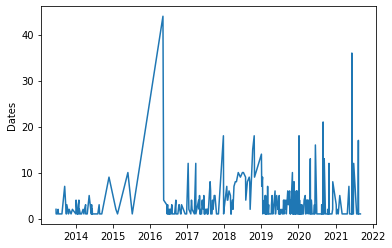

In [225]:
sns.lineplot(x=dt.index, y=dt['Dates'],
             data=dt)